In [287]:
import pandas as pd
import numpy as np

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [289]:
import chart_studio.plotly as py
import cufflinks as cf

In [290]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [291]:
init_notebook_mode(connected=True)

In [292]:
cf.go_offline()

In [293]:
df = pd.read_csv('stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [294]:
df['work_type']

0             Private
1       Self-employed
2             Private
3             Private
4       Self-employed
5             Private
6             Private
7             Private
8             Private
9             Private
10            Private
11           Govt_job
12            Private
13            Private
14            Private
15      Self-employed
16            Private
17            Private
18            Private
19           Govt_job
20           Govt_job
21      Self-employed
22      Self-employed
23            Private
24            Private
25      Self-employed
26            Private
27            Private
28      Self-employed
29            Private
            ...      
5080    Self-employed
5081         Govt_job
5082          Private
5083          Private
5084          Private
5085          Private
5086          Private
5087    Self-employed
5088    Self-employed
5089         children
5090         Govt_job
5091          Private
5092         Govt_job
5093         Govt_job
5094      

d: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [296]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [297]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


/Users/user/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



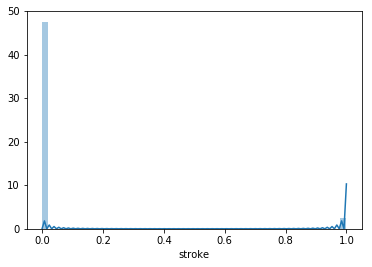

In [298]:
sns.distplot(df['stroke'])

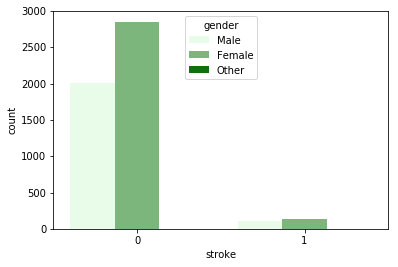

In [299]:
sns.countplot(x='stroke', data =df, hue='gender', color='green')

The female gender are more likely to develop stroke than the opposite sex

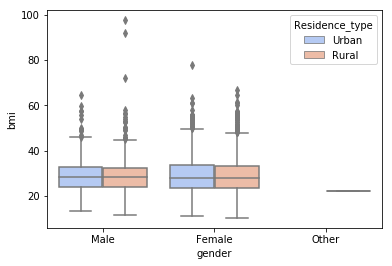

In [300]:
sns.boxplot(x='gender', y='bmi', data=df, palette='coolwarm', hue='Residence_type')

Looking closely, we can see that individuals in Urban areas have higher BMIs which is a contributing factor to stroke. Particularly, ischemic stroke.

In [301]:
df['bmi'].isnull().sum()

201

In [302]:
df['bmi'].max()

97.6

In [303]:
df['bmi'].min()
#df['bmi'].mean()

10.3

In [304]:
df[df['bmi']== 97.6]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0


In [305]:
df[df['avg_glucose_level']==df['bmi'].max()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1312,4702,Female,3.0,0,0,No,children,Rural,97.6,25.8,Unknown,0
3879,24920,Female,35.0,0,0,Yes,Govt_job,Rural,97.6,44.8,smokes,0


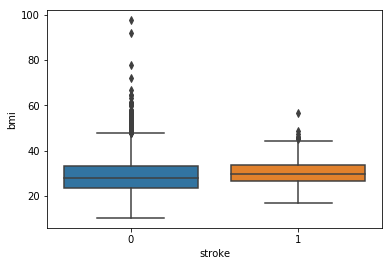

In [306]:
sns.boxplot(x='stroke', y='bmi', data=df)

In [307]:
def imput_bmi(bmi):
    if pd.isnull(bmi):
        return 28
    else:
        return bmi

In [308]:
df['bmi'] = df['bmi'].apply(imput_bmi)

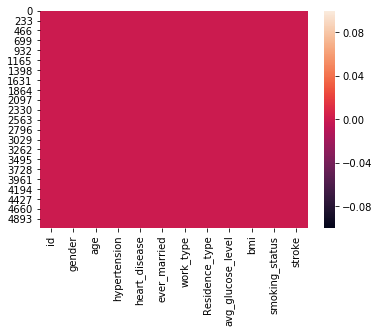

In [309]:
sns.heatmap(df.isnull())

In [310]:
df['bmi'].isnull().sum()

0

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  5110 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


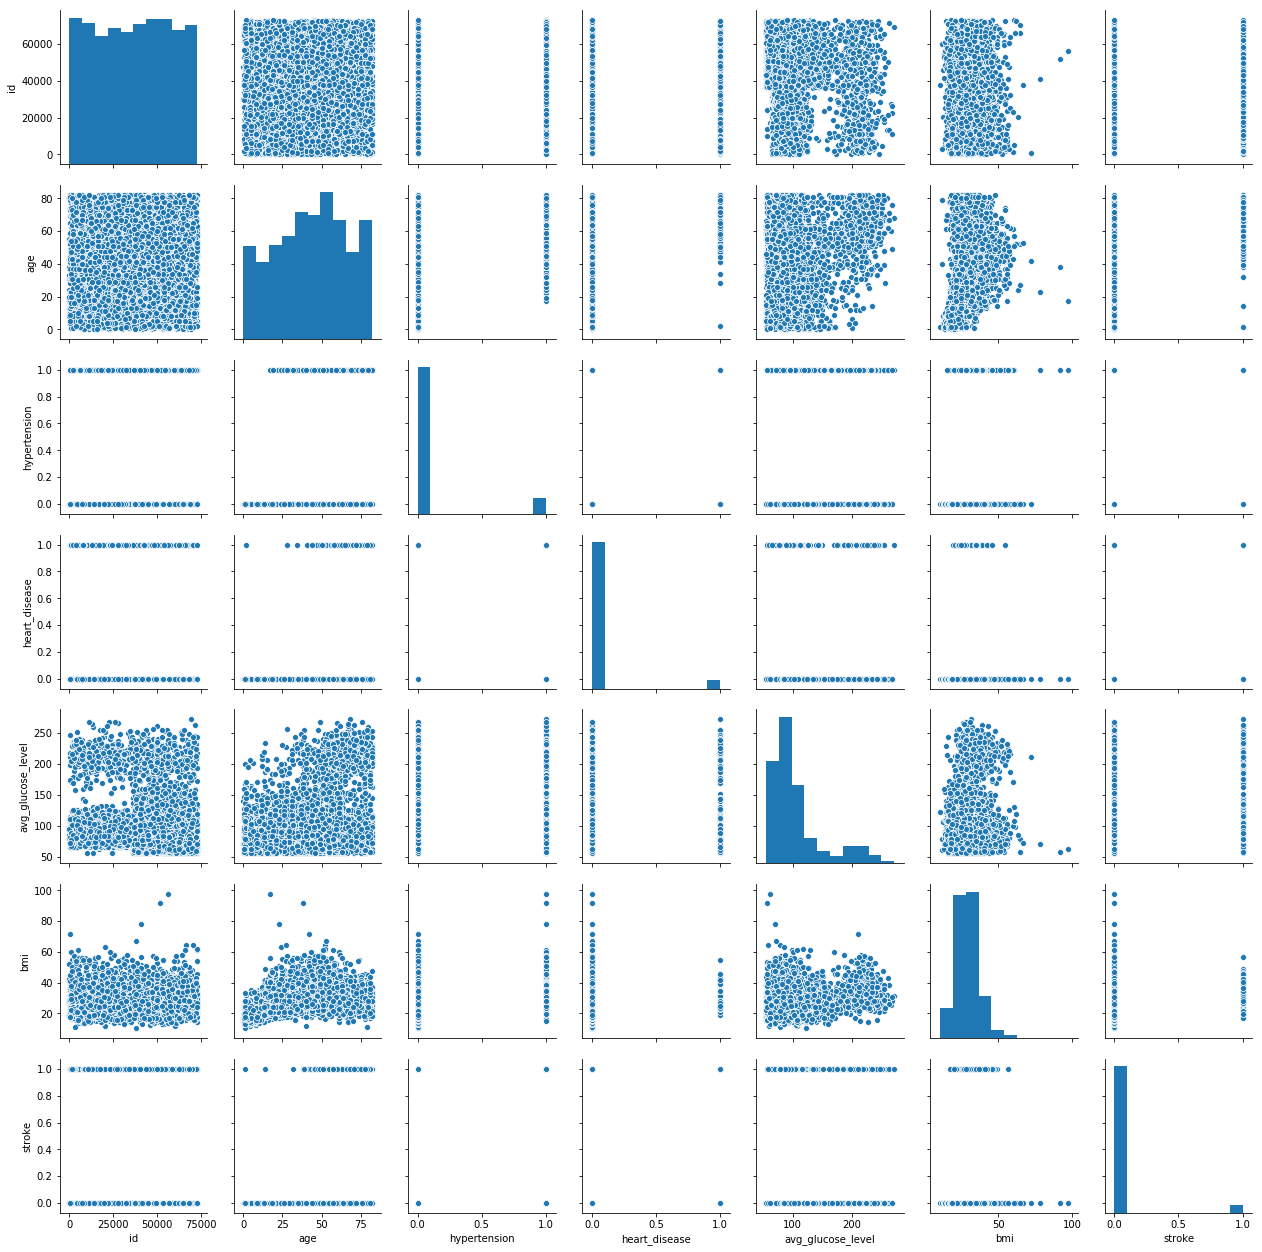

In [312]:
sns.pairplot(df)

Converting categorical features to numerical features

In [313]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [314]:
sex = pd.get_dummies(df['gender'],drop_first=True)

In [315]:
sex.head()

,Male,Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [316]:
sex.drop(columns='Other', axis =1,inplace=True)

In [317]:
sex.head()

,Male
0,1
1,0
2,1
3,0
4,0


In [318]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [319]:
married = pd.get_dummies(df['ever_married'],drop_first=True)
married.head()

,Yes
0,1
1,1
2,1
3,1
4,1


In [320]:
smoking = pd.get_dummies(df['smoking_status'],drop_first=True)
smoking.head()

,formerly smoked,never smoked,smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [321]:
smoking.drop(columns=['formerly smoked','never smoked'], axis =1,inplace=True)
smoking.head()

,smokes
0,0
1,0
2,0
3,1
4,0


In [322]:
Residence = pd.get_dummies(df['Residence_type'],drop_first=True)
Residence.head()

,Urban
0,1
1,0
2,0
3,1
4,0


In [323]:
df.drop(['gender','Residence_type','smoking_status','ever_married'],axis=1,inplace=True)
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,Private,228.69,36.6,1
1,51676,61.0,0,0,Self-employed,202.21,28.0,1
2,31112,80.0,0,1,Private,105.92,32.5,1
3,60182,49.0,0,0,Private,171.23,34.4,1
4,1665,79.0,1,0,Self-employed,174.12,24.0,1


In [324]:
df = pd.concat([df,Residence,smoking,married,sex], axis=1)
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,Urban,smokes,Yes,Male
0,9046,67.0,0,1,Private,228.69,36.6,1,1,0,1,1
1,51676,61.0,0,0,Self-employed,202.21,28.0,1,0,0,1,0
2,31112,80.0,0,1,Private,105.92,32.5,1,0,0,1,1
3,60182,49.0,0,0,Private,171.23,34.4,1,1,1,1,0
4,1665,79.0,1,0,Self-employed,174.12,24.0,1,0,0,1,0


In [325]:
df.drop(['work_type'],axis=1,inplace=True)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban,smokes,Yes,Male
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,1
1,51676,61.0,0,0,202.21,28.0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,0,1,1
3,60182,49.0,0,0,171.23,34.4,1,1,1,1,0
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0


Building a Logistic Regression Model

In [331]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'Urban', 'smokes', 'Yes', 'Male'],
      dtype='object')

In [332]:
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'Urban', 'smokes', 'Yes', 'Male']]
y = df['stroke']

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=100)

Training and Predicting

In [333]:
from sklearn.linear_model import LogisticRegression

In [335]:
LogModel = LogisticRegression()

In [336]:
LogModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Prediction

In [337]:
stroke_predict = LogModel.predict(X_test)
stroke_predict

array([0, 0, 0, ..., 0, 0, 0])

In [338]:
from sklearn.metrics import classification_report

In [340]:
print(classification_report(y_test,stroke_predict))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98      1464
          1       0.00      0.00      0.00        69

avg / total       0.91      0.95      0.93      1533



/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

